In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
from movenet_helper import * 
import matplotlib.pyplot as plt
import cv2 

In [8]:
input_size = 192
model = hub.load(".\model\movenet_singlepose_lightning_4")
movenet = model.signatures['serving_default']

# Image Example 

In [9]:
image_path = './input/woman.jpg'
image = tf.io.read_file(image_path)
image = tf.compat.v1.image.decode_jpeg(image)
#print(image.shape)
input_image = tf.expand_dims(image, axis=0)
#print(image.shape) # added 1 dim
input_image = tf.cast(tf.image.resize_with_pad(input_image, input_size, input_size), dtype=tf.int32)


In [10]:
keypoints_with_scores = movenet(input_image)['output_0']

In [11]:
keypoints_with_scores

<tf.Tensor: shape=(1, 1, 17, 3), dtype=float32, numpy=
array([[[[0.29979432, 0.5849016 , 0.5814166 ],
         [0.28080112, 0.6084914 , 0.61866015],
         [0.27343678, 0.56791824, 0.54429597],
         [0.3004163 , 0.62541604, 0.5808592 ],
         [0.28499383, 0.53410244, 0.6119392 ],
         [0.4146759 , 0.65475   , 0.6480183 ],
         [0.39879978, 0.47912222, 0.72280353],
         [0.554812  , 0.6755494 , 0.3448707 ],
         [0.5708854 , 0.46215987, 0.5788151 ],
         [0.6101711 , 0.6762423 , 0.23810695],
         [0.59814435, 0.62389624, 0.55753535],
         [0.7253303 , 0.6379918 , 0.45480186],
         [0.72811294, 0.5208486 , 0.45715332],
         [0.8070771 , 0.66944194, 0.18746853],
         [0.8161985 , 0.5843009 , 0.17001738],
         [0.7925059 , 0.6591855 , 0.12868452],
         [0.79437155, 0.644375  , 0.11510048]]]], dtype=float32)>

In [12]:
display_image = tf.expand_dims(image, axis=0)
display_image = tf.cast(tf.image.resize_with_pad(display_image, 1280, 1280), dtype=tf.int32)
output_overlay = draw_prediction_on_image(
    np.squeeze(display_image.numpy(), axis=0), keypoints_with_scores)

In [14]:
output_overlay.shape 

(1200, 1200, 3)

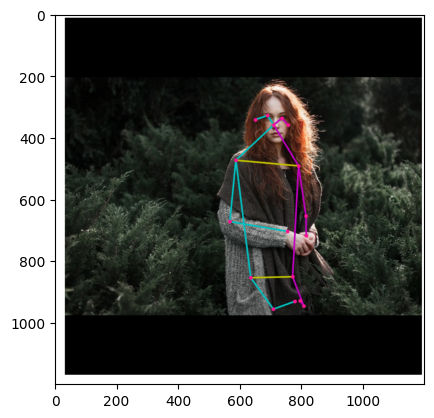

In [15]:
plt.imshow(output_overlay)

# Video Example 

In [24]:
size = (1200, 1200)
fps = 10
output_sequences = []
out = cv2.VideoWriter("./output/example.avi", cv2.VideoWriter_fourcc(*'XVID'), fps, size)
for pic in frame_generator("./input/dance.mp4", 100):
    frame = tf.expand_dims(pic, axis=0)
    input_frame = tf.cast(tf.image.resize_with_pad(frame, input_size, input_size), dtype=tf.int32)
    keypoints_with_scores = movenet(input_frame)['output_0']
    # Width and height are hard-coded at this moment, but can be inferred using cv2.
    display_image = tf.cast(tf.image.resize_with_pad(frame, 1200, 1200), dtype=tf.int32)
    output_overlay = draw_prediction_on_image(
        np.squeeze(display_image.numpy(), axis=0), keypoints_with_scores)

    print(output_overlay.shape)
    out.write(output_overlay)

cv2.destroyAllWindows()
out.release()


(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1200, 3)
(1200, 1